In [2]:
# importing pandas and opening the exxcel file. 
# The sheet_name argument is used to select particular sheets in the file.
import pandas as pd
import math
#reading the file
df = pd.read_excel(r"C:\Users\USER\Desktop\work\shark.xlsx",sheet_name = "Shark Tank US dataset")
# creating the dataframe called Sharkt.
Sharkt = pd.DataFrame(df)


In [3]:
# Getting basic info on the columns, I dod this to see what columns exist and if they are in the right data type.
Sharkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 48 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Season Number                       1267 non-null   int64         
 1   Season Start                        1267 non-null   datetime64[ns]
 2   Season End                          1267 non-null   datetime64[ns]
 3   Episode Number                      1267 non-null   int64         
 4   Pitch Number                        1267 non-null   int64         
 5   Original Air Date                   1267 non-null   datetime64[ns]
 6   Startup Name                        1267 non-null   object        
 7   Industry                            1267 non-null   object        
 8   Pitchers Gender                     1267 non-null   object        
 9   Pitchers City                       500 non-null    object        
 10  Pitchers State          

In [4]:
# to get a view of the first few rows of the dataframe
Sharkt.head()

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Pitchers City,...,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Guest Name,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,Atlanta,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,Somerset,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,Cary,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,Tampa,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,St. Paul,...,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0


In [5]:
# Now we check for missing values
print(Sharkt.isna().sum())
# the pitchers city, pitchers state, Guest name and pitchers average age columns have more than half thier values missing
# and are independent so they can't be deduced.
Sharkt = Sharkt.drop(['Pitchers City','Pitchers State','Pitchers Average Age','Guest Name'], axis = 1)



Season Number                            0
Season Start                             0
Season End                               0
Episode Number                           0
Pitch Number                             0
Original Air Date                        0
Startup Name                             0
Industry                                 0
Pitchers Gender                          0
Pitchers City                          767
Pitchers State                         523
Pitchers Average Age                   931
Company Website                        754
Multiple Entrepreneurs                 427
US Viewership                            0
Original Ask Amount                      0
Original Offered Equity                  0
Valuation Requested                      0
Got Deal                                 0
Total Deal Amount                      507
Total Deal Equity                      507
Deal Valuation                         507
Number of sharks in deal               507
Investment 

In [6]:
# Changing values in got deal column from 0 and 1
Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(0,"NO")

Sharkt["Got Deal"] = Sharkt["Got Deal"].replace(1,"YES")



In [7]:
# In the dataset when a company has no website it is left blank so we fill blanks with no website
Sharkt["Company Website"] = Sharkt["Company Website"].fillna("No website")




In [8]:
# In the dataset when a company was not invested in it is left blank so we fill blanks with did not invest
Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]] = Sharkt[["Total Deal Amount","Total Deal Equity","Deal Valuation","Number of sharks in deal","Investment Amount Per Shark","Equity Per Shark"]].fillna("Did not invest")
Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]] = Sharkt[["Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity","Mark Cuban Investment Amount","Mark Cuban Investment Equity","Lori Greiner Investment Amount","Lori Greiner Investment Equity","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity","Daymond John Investment Amount","Daymond John Investment Equity","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity","Guest Investment Amount","Guest Investment Equity"]].fillna("Did not Invest")




In [9]:
# Changing values from 0 to 1 with 1 meaning its a royalty deal and 0 meaniing advisory deal
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].replace(1,"Royalty deal")
Sharkt["Royalty Deal"] = Sharkt["Royalty Deal"].fillna("Advisory deal")



In [10]:
# If no loan was taken it is left empty

Sharkt["Loan"] = Sharkt["Loan"].fillna("No loan")





In [11]:
# Changing the values for presence of sharks from 0 and 1 to present and not
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].fillna("unknown")

Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(0,"Not present")
Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]] = Sharkt[["Barbara Corcoran Present","Mark Cuban Present","Lori Greiner Present","Robert Herjavec Present","Daymond John Present","Kevin O Leary Present"]].replace(1,"Present")


In [12]:
# Creates a new column with unique names for each episode
Sharkt['Episode Name'] = 's' + Sharkt['Season Number'].astype(str) + 'ep' + Sharkt['Episode Number'].astype(str)
print(Sharkt['Episode Name'])

0         s1ep1
1         s1ep1
2         s1ep1
3         s1ep1
4         s1ep1
         ...   
1262    s14ep21
1263    s14ep22
1264    s14ep22
1265    s14ep22
1266    s14ep22
Name: Episode Name, Length: 1267, dtype: object


In [13]:
#extracts the year of release from the original air date column
Sharkt['Release year'] = Sharkt['Original Air Date'].dt.strftime('%Y')

In [14]:
# Creates a new column showing what month the episodes were aired
Sharkt['Release month'] = Sharkt["Original Air Date"].dt.strftime('%b')

In [15]:
pd.set_option('display.max_rows',None)
display(Sharkt['Release year'])

0       2009
1       2009
2       2009
3       2009
4       2009
5       2009
6       2009
7       2009
8       2009
9       2009
10      2009
11      2009
12      2009
13      2009
14      2009
15      2009
16      2009
17      2009
18      2009
19      2009
20      2009
21      2009
22      2009
23      2009
24      2009
25      2009
26      2009
27      2009
28      2009
29      2009
30      2009
31      2009
32      2009
33      2009
34      2009
35      2009
36      2009
37      2009
38      2009
39      2009
40      2009
41      2009
42      2009
43      2009
44      2009
45      2009
46      2010
47      2010
48      2010
49      2010
50      2010
51      2010
52      2010
53      2010
54      2010
55      2010
56      2010
57      2010
58      2010
59      2010
60      2010
61      2010
62      2010
63      2010
64      2011
65      2011
66      2011
67      2011
68      2011
69      2011
70      2011
71      2011
72      2011
73      2011
74      2011
75      2011
76      2011

In [16]:
from IPython.display import display
display(Sharkt)


,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,...,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Episode Name,Release year,Release month
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,http://www.wispots.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,http://collegehunkshaulingjunk.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,No website,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
5,1,2009-08-09,2010-02-05,2,6,2009-08-16,APerfectPear,Food and Beverage,Female,http://www.aperfectpear.com,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep2,2009,Aug
6,1,2009-08-09,2010-02-05,2,7,2009-08-16,ClassroomJams,Children/Education,Male,http://www.attachnoted.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep2,2009,Aug
7,1,2009-08-09,2010-02-05,2,8,2009-08-16,Lifebelt,Automotive,Male,No website,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep2,2009,Aug
8,1,2009-08-09,2010-02-05,2,9,2009-08-16,CrookedJaw,Fashion/Beauty,Male,http://crookedjawfashions.com/,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep2,2009,Aug
9,1,2009-08-09,2010-02-05,2,10,2009-08-16,StickyNoteHolder,Lifestyle/Home,Female,No website,...,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep2,2009,Aug


In [17]:
import numpy as np
import matplotlib.pyplot as plt
# Answering the questions
# Average no of episodes per season.
print(Sharkt.groupby('Season Number')["Episode Name"].nunique().mean())

22.642857142857142


In [18]:
# Answering questions that give more information on How the show is doing i.e(views)

In [19]:
# How many episodes per season
import matplotlib.pyplot as plt

In [20]:
# Creates a series containing the number of episodes per season
unique_episodes_per_season = Sharkt.groupby('Season Number')['Episode Name'].nunique() # because the data has repitions of the same episode we select only unique ones
ep_per_season_labels = list(unique_episodes_per_season) # list of data labels for the bar plot

Text(0, 0.5, 'No of episodes')

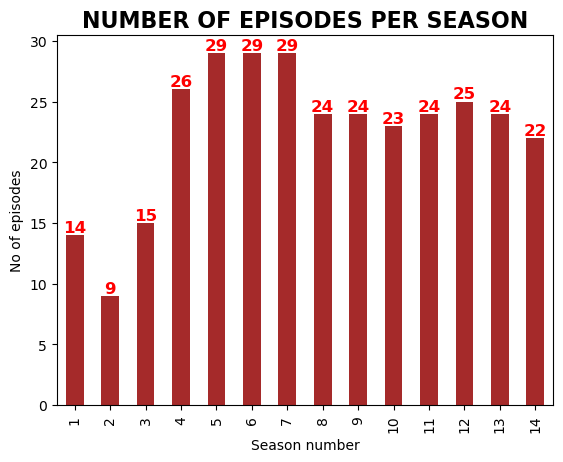

In [21]:
# plots the bar graph
unique_episodes_per_season.plot(kind = 'bar',color='brown')
# places data labels showing the no of episodes
for season, label in enumerate(ep_per_season_labels):
    plt.text(season, ep_per_season_labels[season], label, ha='center', va = "bottom",color='red',fontweight='bold',fontsize=12)
# Customizing the plot
plt.title("NUMBER OF EPISODES PER SEASON",fontweight='bold',fontsize=16)
plt.xlabel('Season number')
plt.ylabel('No of episodes')

In [22]:
# Season 5,6, and 7 have the highest number of episodes (29) While season 2 has the least (9)

In [23]:
# next we find the episode with thee most views

In [24]:
# finds the maximum no of views
max_views = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['US Viewership']
#find the episode with the most no of views
max_views_episode = Sharkt.loc[Sharkt['US Viewership'].idxmax()]['Episode Name']

print('The episode with the most views is: ' + max_views_episode.upper() + ' with ' + str(max_views) + ' million views')

The episode with the most views is: S6EP15 with 8.64 million views


In [25]:
# next we find the season with the most views

In [26]:
# creates a dataframe with only unique episode values and the corresponding views.
Sharkt_unique_episodes = Sharkt.drop_duplicates(subset = "Episode Name")
max_seasonal_views = Sharkt_unique_episodes.groupby('Season Number')['US Viewership'].sum()

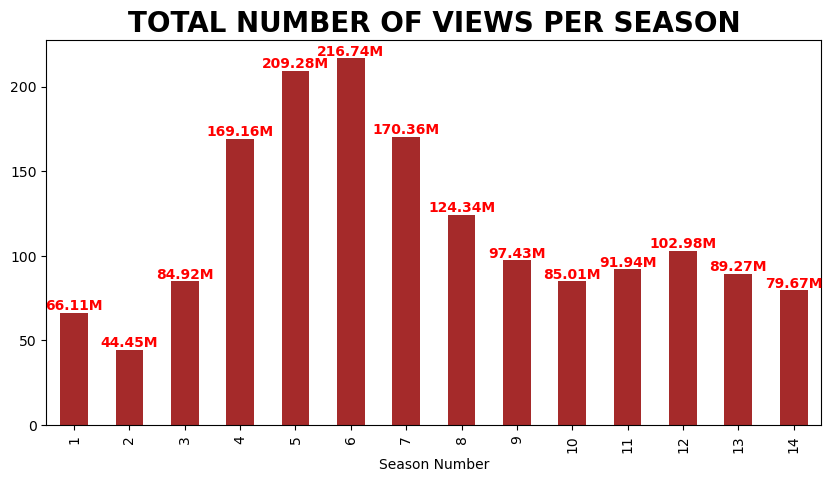

In [27]:
plt.figure(figsize=(10,5))
max_seasonal_views.plot(kind='bar',color='brown')
for i,v in enumerate(max_seasonal_views):
    plt.text(i,v,str(round(v,2))+'M',fontweight='bold',va='bottom',ha='center',color='red')
    plt.title('TOTAL NUMBER OF VIEWS PER SEASON',fontsize=20,fontweight='bold')

In [28]:
# what season has the most views?
print(max_seasonal_views.loc[max_seasonal_views== max_seasonal_views.max()])

Season Number
6    216.74
Name: US Viewership, dtype: float64


In [29]:
print('The average number of views per season is '+ str(round(max_seasonal_views.mean(),2)) + 'M Views')

The average number of views per season is 116.55M Views


In [30]:
# We can see season 6 has the most views with 217million

In [31]:
# Line chart monitoring number of views by year

In [32]:
# drops repeat episodes from the data creating a unique dataframe 
unique_sharkt = Sharkt.drop_duplicates(subset = 'Episode Name')

In [33]:
no_of_views = unique_sharkt['US Viewership'].sum()
print('Total number of views is ' + str(round(no_of_views/1000,1)) + 'B+ Views')

Total number of views is 1.6B+ Views


In [34]:
no_of_views = unique_sharkt['US Viewership'].mean()
print('Average number of views is ' + str(round(no_of_views,2)) + 'M+ Views')

Average number of views is 5.15M+ Views


In [35]:
# a series that shows total views per year
Views_by_time = unique_sharkt.groupby('Release year')['US Viewership'].sum() #creates the series
views_per_year_labels = list(Views_by_time) # list of data labels for line plot

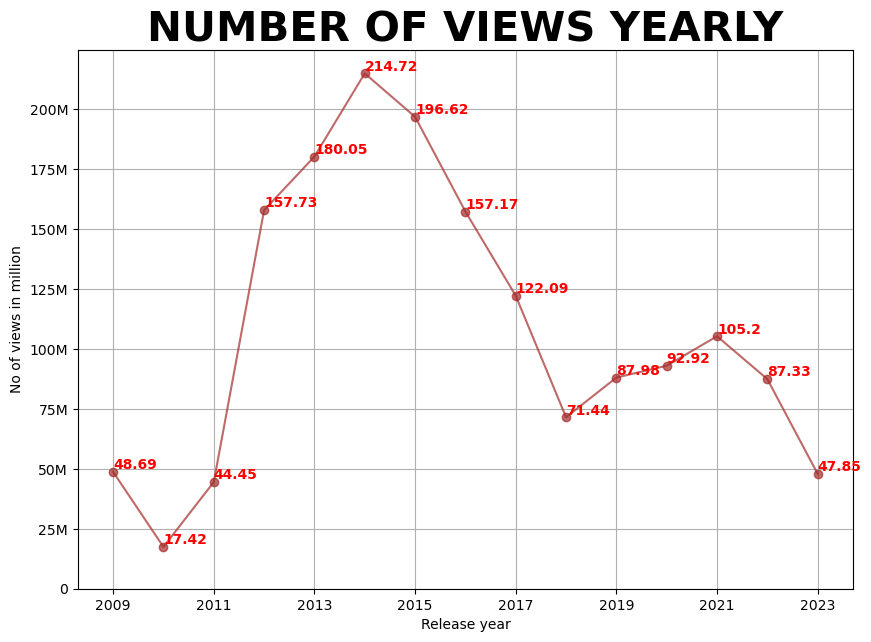

In [36]:
# plots the line graph showing the total number of views for each year
plt.figure(figsize=(10,7))
Views_by_time.plot(kind = 'line', color ='brown',marker ='o',alpha = 0.7)
# customizing the plot
plt.ylabel("No of views in million")
plt.title("NUMBER OF VIEWS YEARLY",fontweight='bold',fontsize=30)
plt.grid(True)
# Setting up y axis labels and values
plt.gca().set_yticks([0,25,50,75,100,125,150,175,200]) #sets scale and values
plt.gca().set_yticklabels(['0','25M','50M','75M','100M','125M','150M','175M','200M']) #sets the labels to be shown on the graph
# Adds data labels
for i, labelz in enumerate(views_per_year_labels):
    x = i  # Use the index for x-coordinate
    y = Views_by_time[i]   # Use the 'Y' column for y-coordinate
    plt.text(x, y, labelz, ha='left', va='bottom',color='red',fontweight='bold')

In [37]:
# Next we look into the contestants on the show, who contests what industry how many?

In [38]:
#pitcher gender distribution
gender_split = Sharkt.groupby('Pitchers Gender')['Pitchers Gender'].count()
gender_split_labels = list(gender_split)

<Figure size 800x600 with 0 Axes>

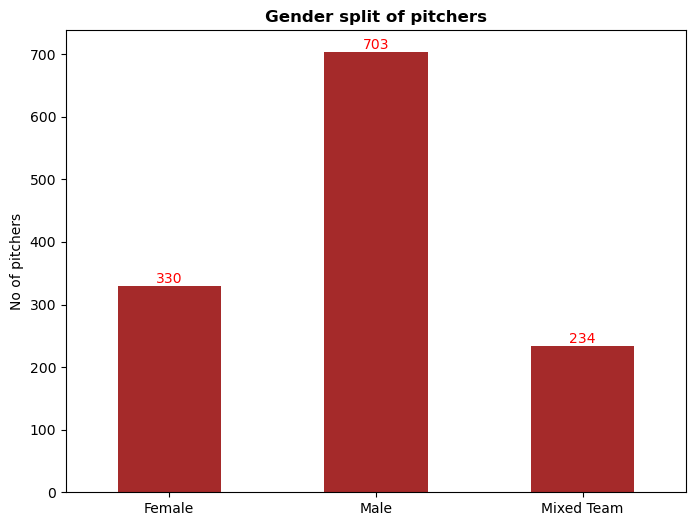

<Figure size 800x600 with 0 Axes>

In [39]:
#plots a graph showing the gender split of pitchers
plt.figure(figsize=(8, 6))
gend = gender_split.plot(kind='bar',color='brown')
plt.title("Gender split of pitchers",fontweight='bold')
plt.ylabel("No of pitchers")
for i,v in enumerate(gender_split):
    plt.text(i,v,str(v),ha='center',va='bottom',color='red')
plt.xticks(rotation=0)
plt.xlabel(None)
plt.figure(figsize = (8,6))

(-1.0999991395294564,
 1.0999999590252123,
 -1.0999999862347405,
 1.099999905268951)

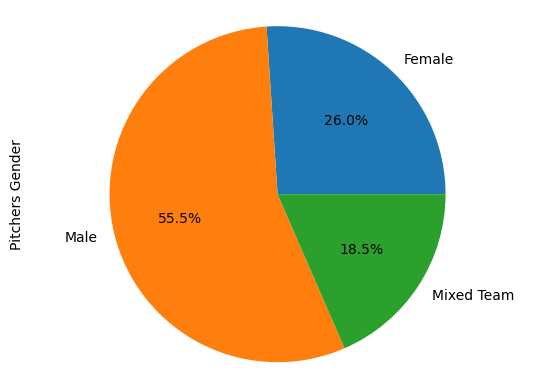

In [40]:
gender_split.plot(kind='pie',autopct = '%1.1f%%')
plt.axis('equal')

In [41]:
#We want to find out which industries have the most and least female and male participants.
gender_industry_prefference = Sharkt[['Pitchers Gender','Industry']].groupby(['Industry','Pitchers Gender']).size().unstack(fill_value=0)
print(gender_industry_prefference.loc[gender_industry_prefference['Female'] == gender_industry_prefference['Female'].max()]['Female'])
print(gender_industry_prefference.loc[gender_industry_prefference['Female'] == gender_industry_prefference['Female'].min()]['Female'])
print(gender_industry_prefference.loc[gender_industry_prefference['Male'] == gender_industry_prefference['Male'].max()]['Male'])
print(gender_industry_prefference.loc[gender_industry_prefference['Male'] == gender_industry_prefference['Male'].min()]['Male'])

Industry
Fashion/Beauty    86
Name: Female, dtype: int64
Industry
Automotive        0
Electronics       0
Liquor/Alcohol    0
Name: Female, dtype: int64
Industry
Food and Beverage    139
Name: Male, dtype: int64
Industry
Liquor/Alcohol     8
Uncertain/Other    8
Name: Male, dtype: int64


In [84]:
# What are the top 5 industries our pitchers work in.
top_5_industries = Sharkt["Industry"].value_counts().nlargest(5)
print(top_5_industries)

Food and Beverage          274
Lifestyle/Home             225
Fashion/Beauty             217
Children/Education         117
Fitness/Sports/Outdoors    113
Name: Industry, dtype: int64


In [88]:
# the industries with the least amount of participants
Sharkt["Industry"].value_counts().nsmallest(5)
for i,v in enumerate(Sharkt["Industry"].value_counts().nsmallest(5)):
    print(Sharkt["Industry"].value_counts().nsmallest(5)[i],str(round(v/total,5))+'%')

8 0.00631%
11 0.00868%
11 0.00868%
15 0.01184%
17 0.01342%


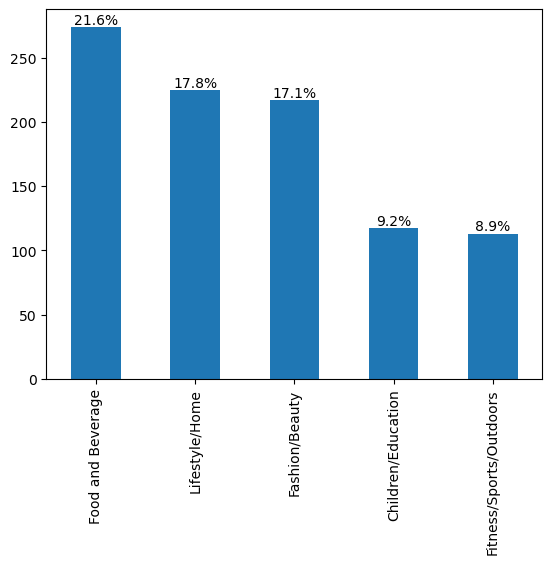

In [81]:
Sharkt['Industry'].value_counts().nlargest(5).plot(kind='bar')
total = Sharkt['Industry'].value_counts().sum()
for i,v in enumerate(Sharkt['Industry'].value_counts().nlargest(5)):
    plt.text(i,v,str(round((v/total)*100,1))+'%',va='bottom',ha='center')

In [44]:
# A pie chart showing these top 5

(-1.101061654256188,
 1.1010333164629922,
 -1.1015376188334232,
 1.1104677059480466)

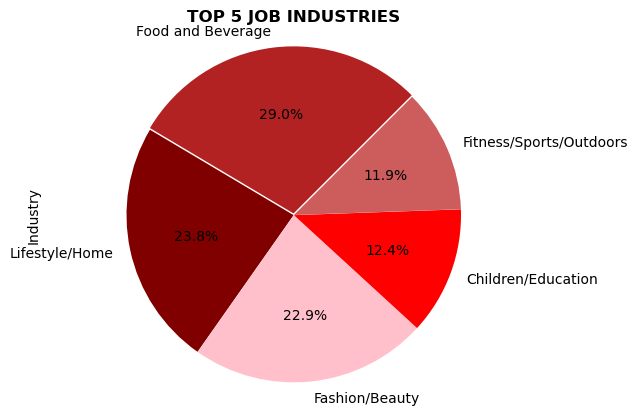

In [45]:
colors = ["firebrick","maroon","pink","red","indianred"]
explode = [0.01,0.001,0.001,0.001,0.001]
labels = ["Food and Beverage","Lifestyle/Home","Fashion/Beauty","Children/Education","Fitness/Sports/Outdoors"]
pie = top_5_industries.plot(kind='pie',colors=colors,autopct = "%1.1f%%",startangle=45,explode=explode,legend=False,labels=labels)
pie.legend().set_visible(False)
plt.title("TOP 5 JOB INDUSTRIES",fontweight='bold')
plt.axis('equal')

In [46]:
# Creating a series that contains information on the top 5 industries and the gender split of pitchers in them.
top_5_industries_list = dict(top_5_industries)
gender_industry_split = Sharkt[Sharkt['Industry'].isin(top_5_industries_list)][['Pitchers Gender','Industry']]
a = gender_industry_split.groupby(['Industry','Pitchers Gender']).size().unstack(fill_value=0)

In [82]:
# Creating a stacked bar chart to show this
print(a)

Pitchers Gender          Female  Male  Mixed Team
Industry                                         
Children/Education           48    39          30
Fashion/Beauty               86    94          37
Fitness/Sports/Outdoors      12    85          16
Food and Beverage            79   139          56
Lifestyle/Home               48   137          40


Text(0, 0.5, 'Number of entreprenuers')

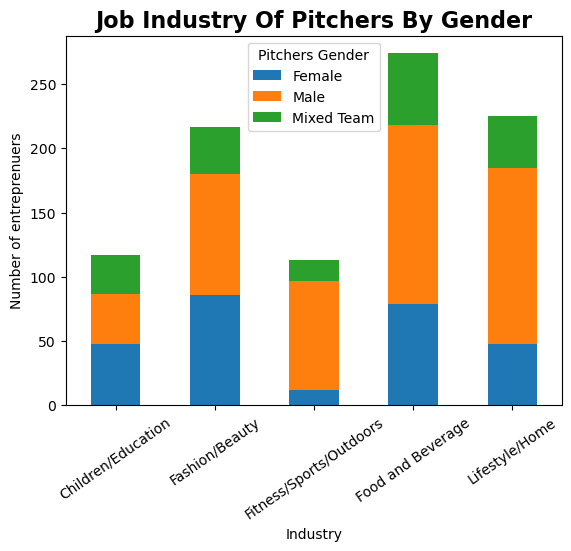

In [48]:
a.plot(kind='bar',stacked=True)
plt.title("Job Industry Of Pitchers By Gender",fontweight='bold',fontsize=16)
plt.xticks(rotation=35)
plt.ylabel("Number of entreprenuers")


In [49]:
# Creating a new dataframe based of Sharkt that filters out rows were no investments were made at all
Shark_deal_amount = Sharkt[Sharkt['Total Deal Amount'] != 'Did not invest']

In [50]:
# What was the average total deal amount, equity and deal valuation
print("Average total deal amount " + str(Shark_deal_amount['Total Deal Amount'].mean()),"Average total deal equity " + str(Shark_deal_amount['Total Deal Equity'].mean())+ '%',"Average deal valuation " + str(Shark_deal_amount['Deal Valuation'].mean()),sep='\n')

Average total deal amount 295971.2710526316
Average total deal equity 24.29892105263156%
Average deal valuation 2179784.3710526316


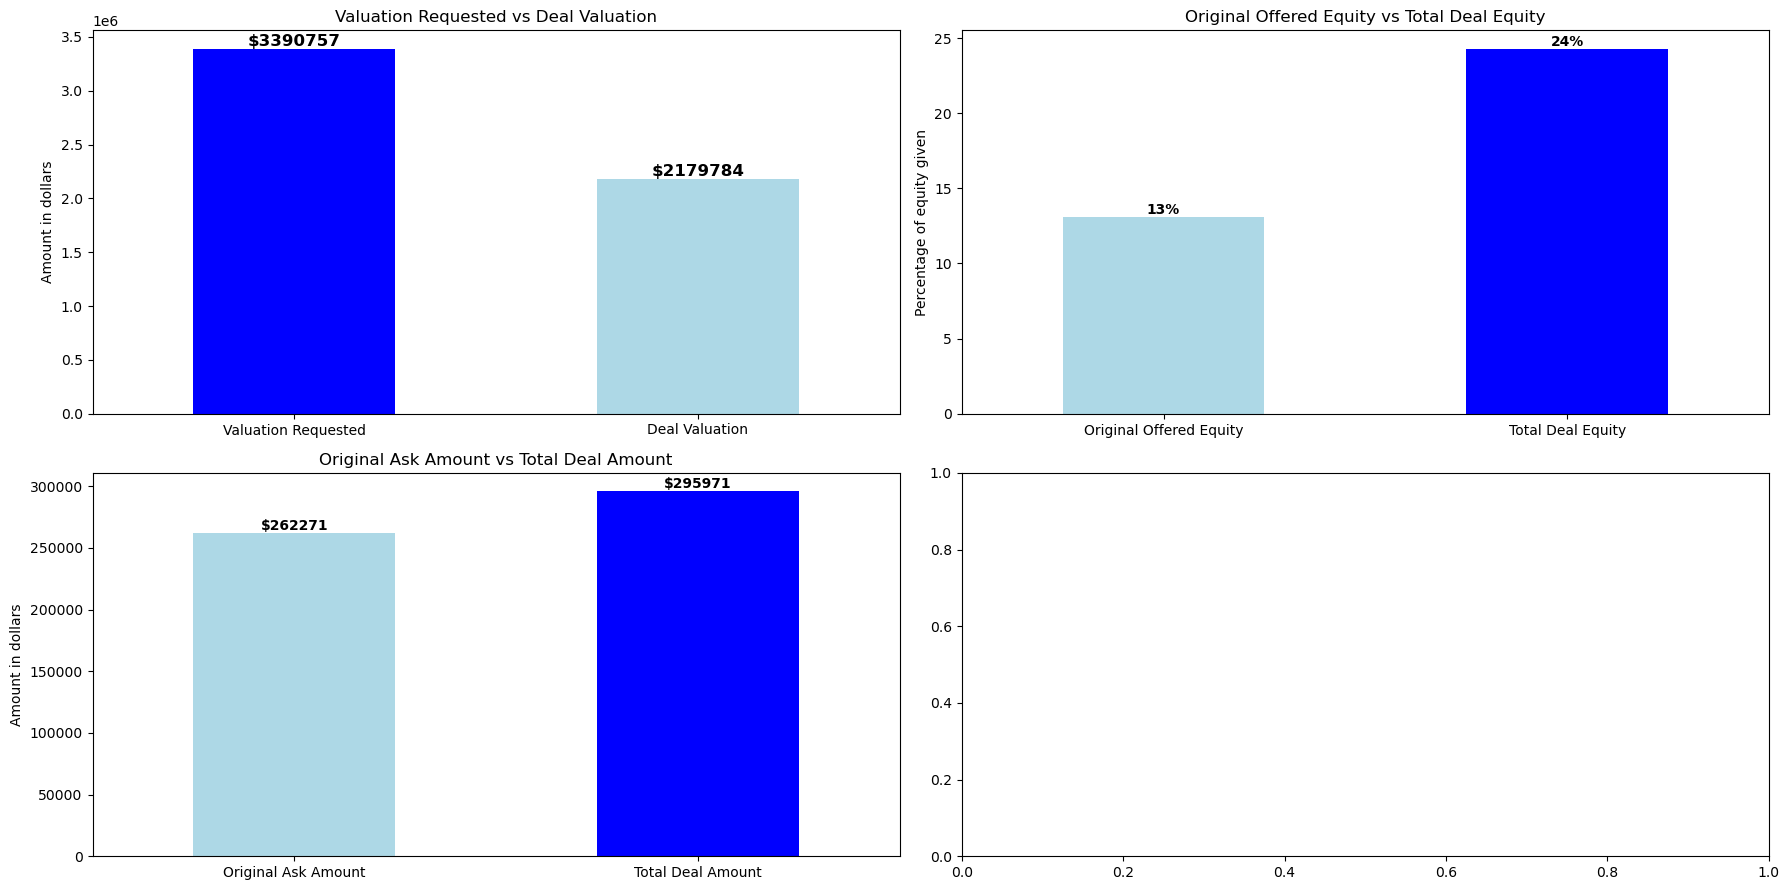

In [51]:
# Create a figure and a grid of 1 row and 3 columns
fig, axes = plt.subplots(2, 2, figsize=(18, 9))

# Subplot 1: Comparing Valuation Requested and Deal Valuation
val_req_deal_val = Shark_deal_amount[['Valuation Requested', 'Deal Valuation']].mean()
val_req_deal_val.plot(kind='bar', color=['blue','lightblue'], ax=axes[0,0])
axes[0,0].set_title('Valuation Requested vs Deal Valuation')
axes[0,0].set_ylabel('Amount in dollars')
axes[0,0].set_xticklabels(val_req_deal_val.index, rotation=0)
for i, v in enumerate(val_req_deal_val):
    axes[0,0].text(i, v, '$' + str(int(v)), fontweight='bold', ha='center', va='bottom', fontsize=12)

# Subplot 2: Comparing Original Offered Equity and Total Deal Equity
orig_eq_total_eq = Shark_deal_amount[['Original Offered Equity', 'Total Deal Equity']].mean()
orig_eq_total_eq.plot(kind='bar', color=['lightblue','blue'], ax=axes[0,1])
axes[0,1].set_title('Original Offered Equity vs Total Deal Equity')
axes[0,1].set_ylabel('Percentage of equity given')
axes[0,1].set_xticklabels(orig_eq_total_eq.index, rotation=0)
for i, v in enumerate(orig_eq_total_eq):
    axes[0,1].text(i, v, str(int(v)) + '%', fontweight='bold', ha='center', va='bottom')

# Subplot 3: Comparing Original Ask Amount and Total Deal Amount
orig_ask_total_deal = Shark_deal_amount[['Original Ask Amount', 'Total Deal Amount']].mean()
orig_ask_total_deal.plot(kind='bar', color=['lightblue', "blue"], ax=axes[1,0])
axes[1,0].set_title('Original Ask Amount vs Total Deal Amount')
axes[1,0].set_ylabel('Amount in dollars')
axes[1,0].set_xticklabels(orig_ask_total_deal.index, rotation=0)
for i, v in enumerate(orig_ask_total_deal):
    axes[1,0].text(i, v, '$' + str(int(v)), fontweight='bold', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [89]:
# getting the differences as figures
print(Shark_deal_amount['Original Ask Amount'].mean()-Shark_deal_amount['Total Deal Amount'].mean())

-33700.218421052676


In [52]:
# Now we look into the investors behaviours   

In [53]:
# How much has each investor invested over the duration of the show

Text(0.5, 1.0, 'Investment Amount per Investor')

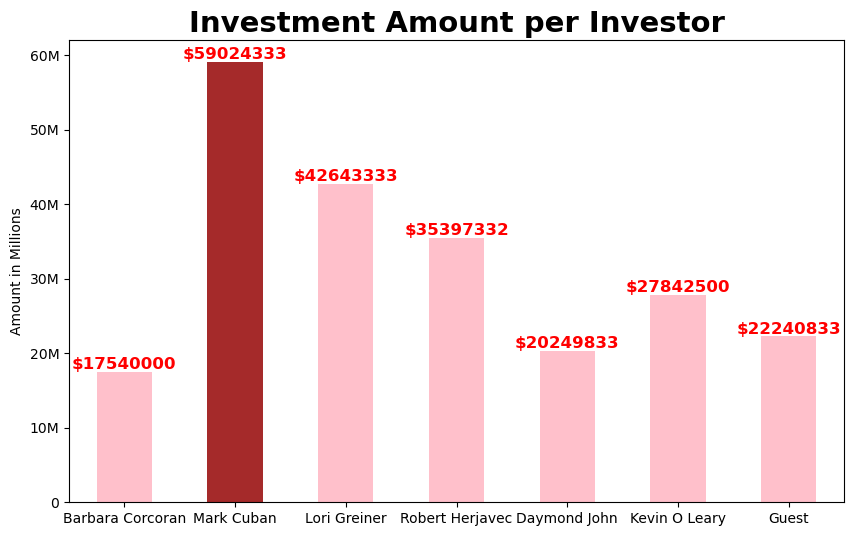

In [54]:
# Configuring our plot size and making sure it does not round up or down values.----------------------------
plt.figure(figsize = (10,6))
pd.set_option('display.float_format', '{:.0f}'.format)
# ---------------------------------------------------------------------------------------
# Creating a slice of the dataframe that contains all we need-----------------------------------------------------------------
Investor_investments = Sharkt[['Barbara Corcoran Investment Amount','Mark Cuban Investment Amount','Lori Greiner Investment Amount','Robert Herjavec Investment Amount','Daymond John Investment Amount','Kevin O Leary Investment Amount','Guest Investment Amount']][Sharkt[['Barbara Corcoran Investment Amount','Mark Cuban Investment Amount','Lori Greiner Investment Amount','Robert Herjavec Investment Amount','Daymond John Investment Amount','Kevin O Leary Investment Amount','Guest Investment Amount']] != "Did not Invest"]
# -------------------------------------------------------------------------------------------------------------
# Creating the plot
Investor_investments.sum().plot(kind='bar',color=['pink','brown','pink','pink','pink','pink'])
# -----------------------------------------------------------------------------------------------
# Setting up x-axis values
x_value_labels = ['Barbara Corcoran','Mark Cuban','Lori Greiner','Robert Herjavec','Daymond John','Kevin O Leary','Guest']
plt.gca().set_xticklabels(x_value_labels)
plt.xticks(rotation=0)
# --------------------------------------------------------------------------------------------------------------
# Setting up y-axis values-----------------------------------------------------------------------------
y_ticks = [0,10000000, 20000000, 30000000, 40000000, 50000000,60000000]
y_labels = ['0','10M', '20M', '30M', '40M', '50M','60M']
plt.yticks(y_ticks,y_labels)
plt.ylabel('Amount in Millions')
# -------------------------------------------------------------------------------------------------------
# Adding data labels to the plot-----------------------------------------------------------------------------
for i,v in enumerate(Investor_investments.sum()):
    plt.text(i,v,'$' + str(int(v)),ha='center',va='bottom',color='red',fontweight='bold',fontsize=12)
#----------------------------------------------------------------
# Adding a title to the plot (Should have put this up to be honest)
plt.title('Investment Amount per Investor',fontweight='bold',fontsize=21)
#------------------------------------------------------------------------------------------------------------------

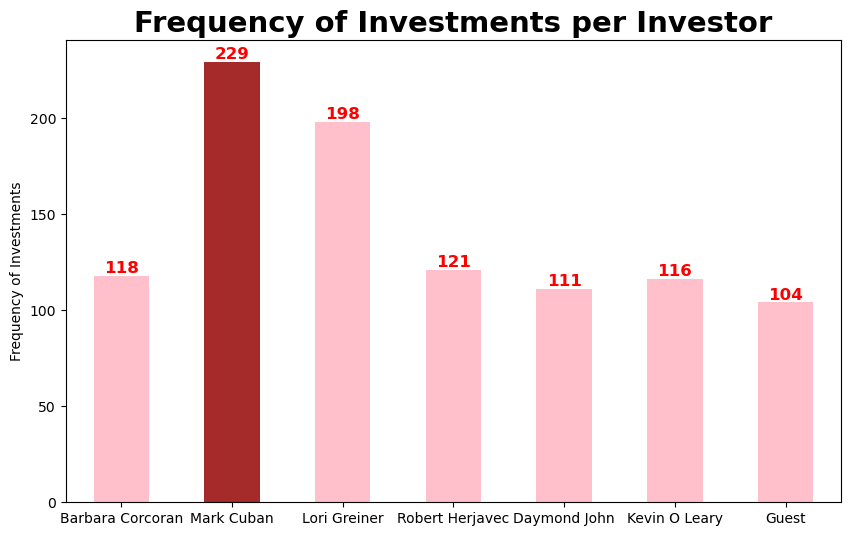

In [55]:
# Investor frequency
plt.figure(figsize=(10,6))
Investor_investments.count().plot(kind='bar',color=['pink','brown','pink','pink','pink','pink']) #How many times each investor invested
plt.title('Frequency of Investments per Investor',fontweight='bold',fontsize=21)
plt.ylabel('Frequency of Investments')
x_value_labels = ['Barbara Corcoran','Mark Cuban','Lori Greiner','Robert Herjavec','Daymond John','Kevin O Leary','Guest']
plt.gca().set_xticklabels(x_value_labels)
plt.xticks(rotation=0)
for i,v in enumerate(Investor_investments.count()):
    plt.text(i,v,str(v),ha='center',va='bottom',color='red',fontweight='bold',fontsize=12)

In [56]:
# How much have the sharks invested total 
print("The investors have invested a total of $"+str(math.floor(Investor_investments.sum().sum())))

The investors have invested a total of $224938165


In [57]:
# Which industries has each investor invested heavily in?

In [58]:
# It can be seen that Mark Cuban has invested $14,888,500 in the food and beverage industry which take up a larger percentage 
#of his investments

In [59]:
mark_investor_filter = Sharkt['Mark Cuban Investment Amount']!= "Did not Invest"
mark_investor = Sharkt[mark_investor_filter]
Mark = mark_investor[['Mark Cuban Investment Amount','Industry']].groupby('Industry')
Mark.sum().nlargest(1,'Mark Cuban Investment Amount')


,Mark Cuban Investment Amount
Industry,
Food and Beverage,14888500


In [60]:
# It can be seen that Barbara Corcoran has invested $6,180,000 in the food and beverage industry also

In [61]:
barbara_investor_filter = Sharkt['Barbara Corcoran Investment Amount']!= "Did not Invest"
barbara_investor = Sharkt[barbara_investor_filter]
Barbara = barbara_investor[['Barbara Corcoran Investment Amount','Industry']].groupby('Industry')
Barbara.sum().nlargest(1,'Barbara Corcoran Investment Amount')

,Barbara Corcoran Investment Amount
Industry,
Food and Beverage,6180000


In [62]:
# Lori harvey is the largest investor in the lifestyle/home industry having invested $12,310,000

In [63]:
lori_investor_filter = Sharkt['Lori Greiner Investment Amount']!= "Did not Invest"
lori_investor = Sharkt[lori_investor_filter]
Lori = lori_investor[['Lori Greiner Investment Amount','Industry']].groupby('Industry')
Lori.sum().nlargest(1,'Lori Greiner Investment Amount')

,Lori Greiner Investment Amount
Industry,
Lifestyle/Home,12310000


In [64]:
# Robert Herjavec and Daymond John have more money invested in Fashion/Beauty than other industries with $5,595,833 and
# $4,360,000 respectively invested

In [65]:
robert_investor_filter = Sharkt['Robert Herjavec Investment Amount']!= "Did not Invest"
robert_investor = Sharkt[robert_investor_filter]
Robert = robert_investor[['Robert Herjavec Investment Amount','Industry']].groupby('Industry')
Robert.sum().nlargest(1,'Robert Herjavec Investment Amount')

,Robert Herjavec Investment Amount
Industry,
Fashion/Beauty,5595833


In [66]:
daymond_investor_filter = Sharkt['Daymond John Investment Amount']!= "Did not Invest"
daymond_investor = Sharkt[daymond_investor_filter]
daymond = daymond_investor[['Daymond John Investment Amount','Industry']].groupby('Industry')
daymond.sum().nlargest(1,'Daymond John Investment Amount')

,Daymond John Investment Amount
Industry,
Fashion/Beauty,4360000


In [67]:
# Kevin O Leary has invested most in the Food and Bevaerage industry with $7,237,500 invested

In [68]:
kevin_investor_filter = Sharkt['Kevin O Leary Investment Amount']!= "Did not Invest"
kevin_investor = Sharkt[kevin_investor_filter]
kevin = kevin_investor[['Kevin O Leary Investment Amount','Industry']].groupby('Industry')
kevin.sum().nlargest(1,'Kevin O Leary Investment Amount')

,Kevin O Leary Investment Amount
Industry,
Food and Beverage,7237500


In [69]:
# How much equity does each investor take on average

Text(0.5, 1.0, 'INVESTOR EQUITY AVERAGES')

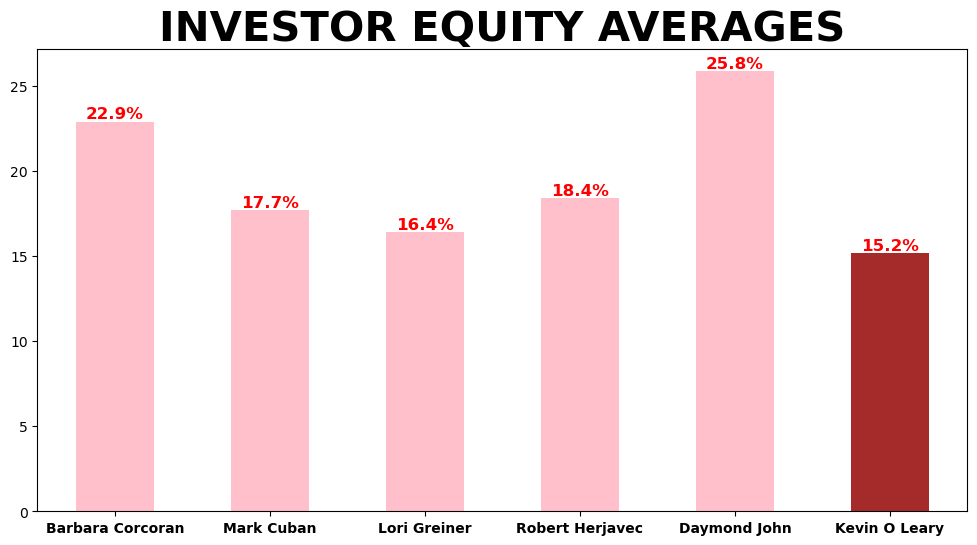

In [70]:
plt.figure(figsize=(12,6))
investor_equity = Sharkt[['Barbara Corcoran Investment Equity','Mark Cuban Investment Equity','Lori Greiner Investment Equity','Robert Herjavec Investment Equity','Daymond John Investment Equity','Kevin O Leary Investment Equity']][Sharkt[['Barbara Corcoran Investment Equity','Mark Cuban Investment Equity','Lori Greiner Investment Equity','Robert Herjavec Investment Equity','Daymond John Investment Equity','Kevin O Leary Investment Equity']] != "Did not Invest"]
investor_equity.mean().plot(kind='bar',color=['pink','pink','pink','pink','pink','brown'])
x_value_labels = ['Barbara Corcoran','Mark Cuban','Lori Greiner','Robert Herjavec','Daymond John','Kevin O Leary']
plt.gca().set_xticklabels(x_value_labels,fontweight='bold')
plt.xticks(rotation=0)
for i,v in enumerate(investor_equity.mean()):
    plt.text(i,v,str(round(v,1))+"%",ha='center',va='bottom',color='red',fontweight='bold',fontsize=12)
plt.title("INVESTOR EQUITY AVERAGES",fontweight='bold',fontsize=30)

In [71]:
# Creating fact and dimension tables for easier analysis

In [72]:
pd.set_option('display.max_columns', None)
Sharkt.head()

,Season Number,Season Start,Season End,Episode Number,Pitch Number,Original Air Date,Startup Name,Industry,Pitchers Gender,Company Website,Multiple Entrepreneurs,US Viewership,Original Ask Amount,Original Offered Equity,Valuation Requested,Got Deal,Total Deal Amount,Total Deal Equity,Deal Valuation,Number of sharks in deal,Investment Amount Per Shark,Equity Per Shark,Royalty Deal,Loan,Barbara Corcoran Investment Amount,Barbara Corcoran Investment Equity,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity,Guest Investment Amount,Guest Investment Equity,Barbara Corcoran Present,Mark Cuban Present,Lori Greiner Present,Robert Herjavec Present,Daymond John Present,Kevin O Leary Present,Episode Name,Release year,Release month
0,1,2009-08-09,2010-02-05,1,1,2009-08-09,AvaTheElephant,Health/Wellness,Female,http://www.avatheelephant.com/,0,4,50000,15,333333,YES,50000,55,90909,1,50000,55,Advisory deal,No loan,50000,55,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
1,1,2009-08-09,2010-02-05,1,2,2009-08-09,Mr.Tod'sPieFactory,Food and Beverage,Male,http://whybake.com/,0,4,460000,10,4600000,YES,460000,50,920000,2,230000,25,Advisory deal,No loan,230000,25,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,230000,25,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
2,1,2009-08-09,2010-02-05,1,3,2009-08-09,Wispots,Business Services,Male,http://www.wispots.com/,0,4,1200000,10,12000000,NO,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Advisory deal,No loan,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
3,1,2009-08-09,2010-02-05,1,4,2009-08-09,CollegeFoxesPackingBoxes,Lifestyle/Home,Male,http://collegehunkshaulingjunk.com/,0,4,250000,25,1000000,NO,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Advisory deal,No loan,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug
4,1,2009-08-09,2010-02-05,1,5,2009-08-09,IonicEar,Software/Tech,Male,No website,0,4,1000000,15,6666667,NO,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Did not invest,Advisory deal,No loan,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Did not Invest,Present,Not present,Not present,Present,Present,Present,s1ep1,2009,Aug


In [73]:
# To make finding column names easier
List_Of_Columns = Sharkt.columns.to_list()
print(List_Of_Columns)

['Season Number', 'Season Start', 'Season End', 'Episode Number', 'Pitch Number', 'Original Air Date', 'Startup Name', 'Industry', 'Pitchers Gender', 'Company Website', 'Multiple Entrepreneurs', 'US Viewership', 'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested', 'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of sharks in deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan', 'Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount', 'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity', 'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity', 'Guest Investment Amount', 'Guest Investment Equity', 'Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Pr

In [74]:
# Season fact table
Season_fact_table = Sharkt[['Original Air Date','Season Number','Season Start','Season End']].drop_duplicates(subset=["Season Number"])
print(Season_fact_table)
Season_fact_table.to_csv('Season_fact_table.csv',index = False)

     Original Air Date  Season Number Season Start Season End
0           2009-08-09              1   2009-08-09 2010-02-05
64          2011-03-20              2   2011-03-20 2011-05-13
100         2012-01-20              3   2012-01-20 2012-05-18
160         2012-09-14              4   2012-09-14 2013-05-17
263         2013-09-20              5   2013-09-20 2014-05-16
379         2014-09-26              6   2014-09-26 2015-05-15
495         2015-09-25              7   2015-09-25 2016-05-20
611         2016-09-23              8   2016-09-23 2017-05-12
707         2017-10-01              9   2017-10-01 2018-02-25
803         2018-10-07             10   2018-10-07 2019-05-12
895         2019-09-29             11   2019-09-29 2020-05-15
991         2020-10-16             12   2020-10-16 2021-05-21
1086        2021-10-08             13   2021-10-08 2022-05-20
1180        2022-09-23             14   2022-09-23 2023-05-19


In [75]:
# Pitcher dimension table
Pitcher_dimension_table = Sharkt.loc[:,['Original Air Date','Season Number','Episode Name','Startup Name','Industry','Pitchers Gender','Company Website','Multiple Entrepreneurs']]
Pitcher_dimension_table["Multiple Entrepreneurs"] = Pitcher_dimension_table["Multiple Entrepreneurs"].replace(0,"NO")
Pitcher_dimension_table["Multiple Entrepreneurs"] = Pitcher_dimension_table["Multiple Entrepreneurs"].replace(1,"YES")
Pitcher_dimension_table["Multiple Entrepreneurs"] = Pitcher_dimension_table["Multiple Entrepreneurs"].fillna("NA")
Pitcher_dimension_table.to_csv('Pitcher_dimension_table.csv',index = False)

In [76]:
# Investor dimension table

In [77]:
Investor_dimension_table = Sharkt[['Original Air Date','Season Number','Episode Name','Barbara Corcoran Investment Amount', 'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount', 'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount', 'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount', 'Robert Herjavec Investment Equity', 'Daymond John Investment Amount', 'Daymond John Investment Equity', 'Kevin O Leary Investment Amount', 'Kevin O Leary Investment Equity','Barbara Corcoran Present', 'Mark Cuban Present', 'Lori Greiner Present', 'Robert Herjavec Present', 'Daymond John Present', 'Kevin O Leary Present']]
Investor_dimension_table.to_csv('Investor_dimension_table.csv',index = False)

In [78]:
# Investment dimension table
Investment_dimension_table = Sharkt[['Pitchers Gender','Original Air Date','Season Number','Episode Name', 'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested', 'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation', 'Number of sharks in deal', 'Investment Amount Per Shark', 'Equity Per Shark', 'Royalty Deal', 'Loan']]
Investment_dimension_table.to_csv("Investment_dimension_table.csv",index = False)

In [79]:
# Episode dimension table
Episode_dimension_table =  Sharkt[['Original Air Date','Season Number','Episode Name','US Viewership']].drop_duplicates(subset = 'Episode Name')
Episode_dimension_table.to_csv("Episode_dimension_table.csv",index = False)

In [80]:
import panel as pn
